# CANCER PREDICTION USING MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("cancer.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

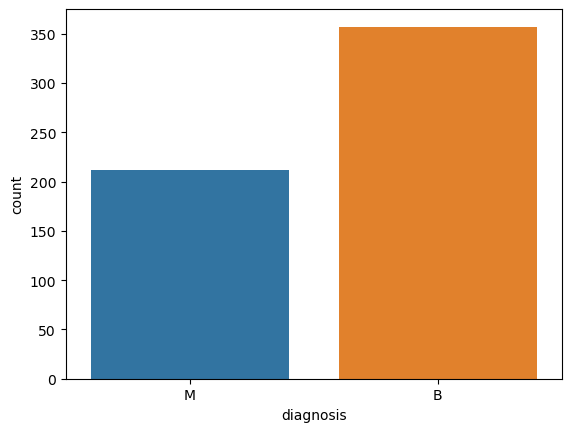

In [6]:
sns.countplot(x='diagnosis',data=df,label='count')

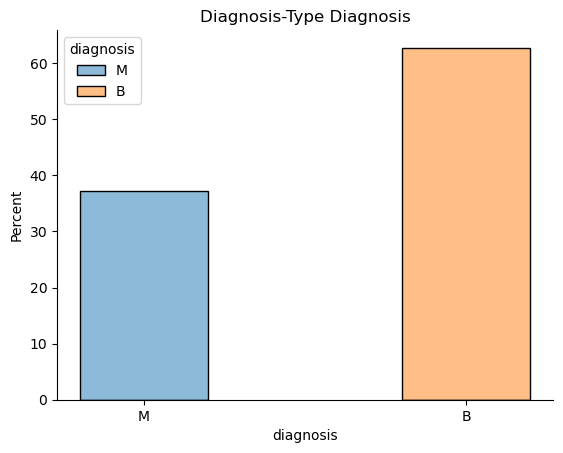

In [7]:
s = sns.histplot(x = 'diagnosis',data = df, hue ='diagnosis', shrink = 0.4, stat = 'percent')
s.set_title("Diagnosis-Type Diagnosis")
sns.despine()

In [8]:
labelencoder = LabelEncoder()
df['diagnosis'] = df[['diagnosis']].apply(labelencoder.fit_transform)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
drop_columns = ['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se','symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst','area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst','fractal_dimension_worst']

In [11]:
df.drop(drop_columns, axis=1, inplace = True)

In [12]:
df = df.reset_index(drop = True)

In [13]:
print('Shape of the Dataset')
print('No of Rows: ', df.shape[0],'| No of Columns: ',df.shape[1])
print(' ')
print('Data Types according to the Column Wise')
print(df.dtypes)
print(' ')
print('Null values ccording to the column wise')
print(df.isnull().sum())

Shape of the Dataset
No of Rows:  569 | No of Columns:  13
 
Data Types according to the Column Wise
diagnosis                   int32
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
concave points_se         float64
concave points_worst      float64
dtype: object
 
Null values ccording to the column wise
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
concave points_se         0
concave points_worst      0
dtype: int64


In [14]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,concave points_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.408042,0.793566
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.376169,0.744214
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.163851,0.295316
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.407217,0.771241
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.372320,0.722017
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.380676,0.503053
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.642262,0.815573
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.683260,0.861323
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.615634,0.910155
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.393298,0.430297


<Axes: >

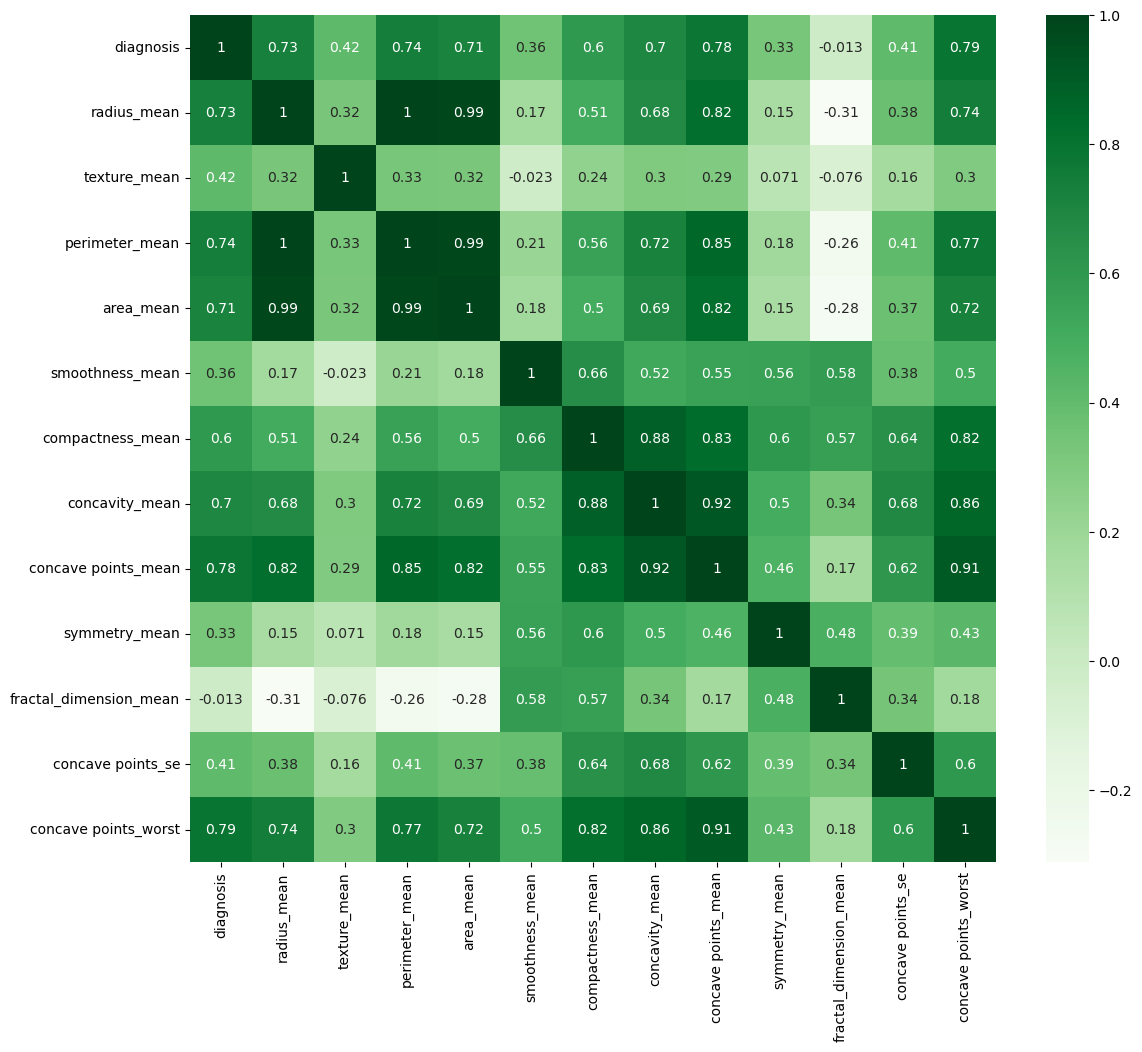

In [15]:
plt.figure(figsize=(13,11))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

<Axes: >

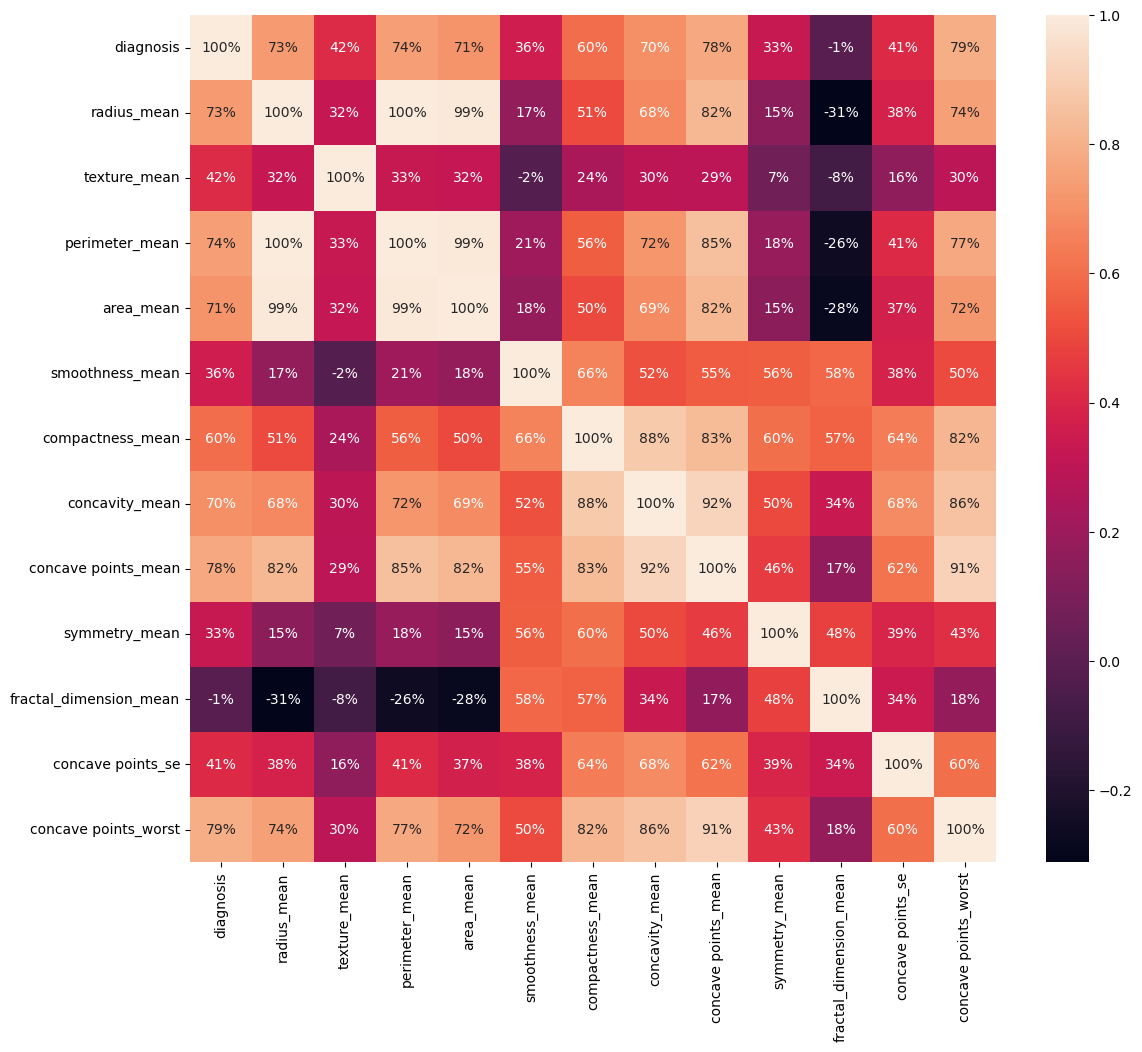

In [16]:
plt.figure(figsize=(13,11))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [17]:
train_data=df.drop('diagnosis',axis=1)
target=df['diagnosis']
train_data.shape,target.shape

((569, 12), (569,))

In [18]:
X_shuf = train_data.copy()
Y_shuf = target.copy()

In [19]:
X_shuf.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,concave points_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.01587,0.2654
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.01340,0.1860
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.02058,0.2430
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.01867,0.2575
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.01885,0.1625


In [20]:
Y_shuf.head(50)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    0
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    1
48    0
49    0
Name: diagnosis, dtype: int32

In [21]:
X,Y = shuffle(X_shuf, Y_shuf)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 2)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
def models(X_train,Y_train):
#Using KNeighborsClassifier 
      knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
      knn.fit(X_train, Y_train)
#Using SVC linear
      svc_lin = SVC(kernel = 'linear', random_state = 1)
      svc_lin.fit(X_train, Y_train)
#Using GaussianNB 
      gauss = GaussianNB()
      gauss.fit(X_train, Y_train)
#Using DecisionTreeClassifier 
      tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
      tree.fit(X_train, Y_train)
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
      forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
      forest.fit(X_train, Y_train)
#print model accuracy on the training data.
      print('[0]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
      print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
      print('[2]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
      print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
      print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

      return knn, svc_lin, gauss, tree, forest

In [25]:
model = models(X_train,Y_train)

[0]K Nearest Neighbor Training Accuracy: 0.9706744868035191
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9765395894428153
[2]Gaussian Naive Bayes Training Accuracy: 0.9325513196480938
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9941348973607038


In [26]:
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TN1 = cm[0][0]
  TP1 = cm[1][1]
  FN1 = cm[1][0]
  FP1 = cm[0][1]
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP1 + TN1) / (TP1 + TN1 + FN1 + FP1)))
  print()

[[144   4]
 [  9  71]]
Model[0] Testing Accuracy = "0.9429824561403509!"

[[146   2]
 [  9  71]]
Model[1] Testing Accuracy = "0.9517543859649122!"

[[138  10]
 [  9  71]]
Model[2] Testing Accuracy = "0.9166666666666666!"

[[137  11]
 [  8  72]]
Model[3] Testing Accuracy = "0.9166666666666666!"

[[141   7]
 [  9  71]]
Model[4] Testing Accuracy = "0.9298245614035088!"



In [27]:
for i in range(len(model)):
  print('Model ',i)
  print( classification_report(Y_test, model[i].predict(X_test)) )
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       148
           1       0.95      0.89      0.92        80

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228

0.9429824561403509

Model  1
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       148
           1       0.97      0.89      0.93        80

    accuracy                           0.95       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

0.9517543859649122

Model  2
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       148
           1       0.88      0.89      0.88        80

    accuracy                           0.92       228
   macro avg       0.91      0.91      0.91       228
weighte

In [28]:
pred = model[2].predict(X_test)
print(pred)
print()
Y_Test=[Y_test]
print(Y_Test)

[0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0]

[150    0
406    0
563    1
168    1
516    1
      ..
268    0
70     1
507    0
247    0
136    0
Name: diagnosis, Length: 228, dtype: int32]


In [29]:
df.tail(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,concave points_worst
549,0,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.00816,0.1976,0.06328,0.005917,0.03264
550,0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,0.000000,0.00000
551,0,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,0.010240,0.06413
552,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,0.009305,0.06498
553,0,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,0.012820,0.02564
554,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,0.007620,0.06493
555,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,0.017210,0.09127
556,0,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.007082,0.02232
557,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,0.000000,0.00000
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,0.016060,0.11050


In [30]:
X_train

array([[ 1.11271466,  0.53132453,  1.04175442, ..., -1.35458289,
         0.50431357, -0.34747293],
       [-0.70373435, -0.0993185 , -0.73905531, ..., -0.17154237,
        -0.69027901, -0.86630946],
       [ 0.06782941,  0.04390446,  0.15817179, ...,  1.42586259,
         2.83484039, -0.19227444],
       ...,
       [ 0.99883071,  0.27721928,  1.04175442, ..., -0.11449219,
         1.20153976,  0.55279896],
       [-0.68949886,  0.1478566 , -0.66587135, ...,  0.31638678,
        -0.00850771, -0.53932179],
       [-0.8290067 ,  0.06700493, -0.86433633, ...,  0.15124153,
        -1.31778257, -1.30505815]])